In [1]:
##import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick  
import seaborn as sns 
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import imblearn packages for imbalanced data
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek


In [2]:
#import scrubbed file for pre-processing
churn_df = pd.read_csv('../data_files/interim/ready_for_preprocessing_Telco_Customer_Churn.csv')
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_of_Services,tenureGroups,Customer_Status,Phone_Internet_bundle
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,2,1 - 12,Active,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,0,4,25 - 36,Active,Yes
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,4,1 - 12,Churned,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,4,37 - 48,Active,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,3,1 - 12,Churned,Yes


In [3]:
#review the data types of the df
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   SeniorCitizen          7032 non-null   object 
 2   Partner                7032 non-null   object 
 3   Dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   PhoneService           7032 non-null   object 
 6   MultipleLines          7032 non-null   object 
 7   InternetService        7032 non-null   object 
 8   OnlineSecurity         7032 non-null   object 
 9   OnlineBackup           7032 non-null   object 
 10  DeviceProtection       7032 non-null   object 
 11  TechSupport            7032 non-null   object 
 12  StreamingTV            7032 non-null   object 
 13  StreamingMovies        7032 non-null   object 
 14  Contract               7032 non-null   object 
 15  Pape

In [4]:
#convert all the remaining categorical variables dummy variables, dropping the first to reduce chances of dummy variable trap
churn_converted = pd.get_dummies(churn_df, dtype=int, drop_first=True)
churn_converted.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Number_of_Services,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureGroups_13 - 24,tenureGroups_25 - 36,tenureGroups_37 - 48,tenureGroups_49 - 60,tenureGroups_61 - 72,tenureGroups_> 72,Customer_Status_Churned,Phone_Internet_bundle_Yes
0,1,29.85,29.85,0,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,34,56.95,1889.50,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,2,53.85,108.15,1,4,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
3,45,42.30,1840.75,0,4,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,3,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1


In [5]:
churn_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7032 non-null   int64  
 4   Number_of_Services                     7032 non-null   int64  
 5   gender_Male                            7032 non-null   int32  
 6   SeniorCitizen_Yes                      7032 non-null   int32  
 7   Partner_Yes                            7032 non-null   int32  
 8   Dependents_Yes                         7032 non-null   int32  
 9   PhoneService_Yes                       7032 non-null   int32  
 10  MultipleLines_No phone service         7032 non-null   int32  
 11  Mult

In [6]:
#export file for ML pipelines in modelling section
#churn_converted = churn_converted.reset_index(drop=True)
#churn_converted.to_csv('../data/interim/ready_for_modelling_Telco_Customer_Churn.csv', index=False)

In [7]:
# before scaling any features; I will split into train and test sets to minimize data leakage. 
X = churn_converted.drop(columns=['Churn', 'Customer_Status_Churned'])
y = churn_converted['Churn']

print(X.shape, y.shape)
# split the data. I'm using random state = 30 for reproducability
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=30)


(7032, 38) (7032,)


In [8]:
print(X_test.shape, y_test.shape)

(1407, 38) (1407,)


In [9]:
X_train.describe()

,tenure,MonthlyCharges,TotalCharges,Number_of_Services,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureGroups_13 - 24,tenureGroups_25 - 36,tenureGroups_37 - 48,tenureGroups_49 - 60,tenureGroups_61 - 72,tenureGroups_> 72,Phone_Internet_bundle_Yes
count,5625.000000,5625.000000,5625.00000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,...,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,32.302222,64.825636,2275.18776,4.585600,0.506667,0.164622,0.480711,0.296178,0.904178,0.095822,...,0.216356,0.332267,0.230044,0.149511,0.123556,0.104889,0.115733,0.160356,0.050133,0.904178
std,24.565876,30.071033,2265.09988,2.548011,0.500000,0.370872,0.499672,0.456611,0.294373,0.294373,...,0.411796,0.471068,0.420898,0.356623,0.329103,0.306437,0.319933,0.366968,0.218239,0.294373
min,1.000000,18.250000,18.85000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.550000,401.50000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,29.000000,70.500000,1388.45000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,89.850000,3778.00000,7.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,72.000000,118.650000,8684.80000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
column_names = X_train.columns
print(column_names)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Number_of_Services',
       'gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenureGroups_13 - 24', 'tenureGroups_25 - 36', 'tenureGroups_37 - 48',
       'tenureGroups_49 - 60', 'tenureGroups_6

In [11]:
print(X_train['MonthlyCharges'].head())
MC_mean = X_train['MonthlyCharges'].mean()
MC_std = X_train['MonthlyCharges'].std()
TC_mean = X_train['TotalCharges'].mean()
TC_std = X_train['TotalCharges'].std()

4505    92.45
3720    89.05
6379    20.40
5213    65.50
1941    90.40
Name: MonthlyCharges, dtype: float64


<Figure size 2000x1000 with 0 Axes>

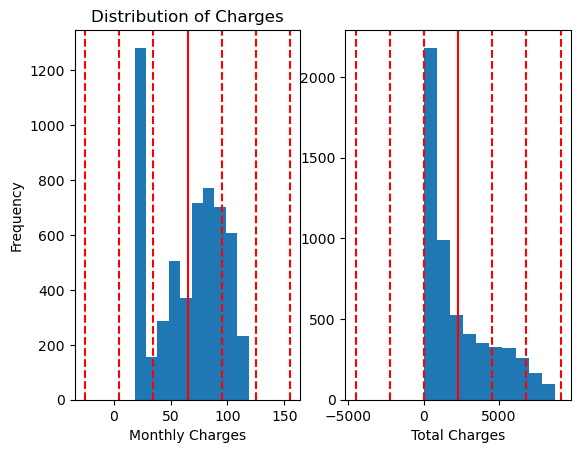

In [12]:
# most of the features in this data set are binary as such
# we will look at MonthlyCharges and TotalCharges in a histogram
#plot histograms for the charges columns to view distribution.

plt.figure(figsize=(20,10))
fig, ax = plt.subplots(1,2)
#plot histogram for MonthlyCharges
ax[0].hist(X_train['MonthlyCharges'], bins=10)
ax[0].set_xlabel("Monthly Charges")
ax[0].set_title("Distribution of Charges")
ax[0].set_ylabel("Frequency")
ax[0].axvline(MC_mean, color='r')
ax[0].axvline(MC_mean + MC_std, color='r', linestyle='--')
ax[0].axvline(MC_mean + MC_std*2, color='r', linestyle='--')
ax[0].axvline(MC_mean + MC_std*3, color='r', linestyle='--')
ax[0].axvline(MC_mean - MC_std, color='r', linestyle='--')
ax[0].axvline(MC_mean - MC_std*2, color='r', linestyle='--')
ax[0].axvline(MC_mean -  MC_std*3, color='r', linestyle='--')
ax[1].hist(X_train['TotalCharges'], bins=10)
ax[1].set_title("")
ax[1].set_xlabel("Total Charges")
ax[1].axvline(TC_mean, color='r')
ax[1].axvline(TC_mean + TC_std, color='r', linestyle='--')
ax[1].axvline(TC_mean + TC_std*2, color='r', linestyle='--')
ax[1].axvline(TC_mean + TC_std*3, color='r', linestyle='--')
ax[1].axvline(TC_mean - TC_std, color='r', linestyle='--')
ax[1].axvline(TC_mean - TC_std*2, color='r', linestyle='--')
ax[1].axvline(TC_mean -  TC_std*3, color='r', linestyle='--')
plt.show()

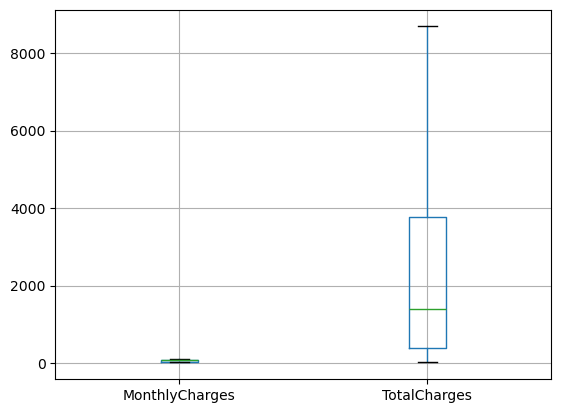

In [13]:
#create boxplots to see if there are potential outliers
X_train[['MonthlyCharges','TotalCharges']].boxplot()
plt.show()

#### All other features are binary, therefore we will use the standard scaler to transform all features as the charges show huge magnitude differences to one another and the binary features.



In [14]:
#instantiate the standard scaler
scaler = StandardScaler()
#fit and transform the monthly charges
X_train_scaled = scaler.fit_transform(X_train)

#convert X_train array back into a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = column_names)

#transform test data
X_test_scaled = scaler.transform(X_test)
#convert X_test array back into a dataframe
X_test_scaled = pd.DataFrame(X_test_scaled, columns = column_names)

# view train dataframe
X_train_scaled.describe().round(3)


,tenure,MonthlyCharges,TotalCharges,Number_of_Services,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureGroups_13 - 24,tenureGroups_25 - 36,tenureGroups_37 - 48,tenureGroups_49 - 60,tenureGroups_61 - 72,tenureGroups_> 72,Phone_Internet_bundle_Yes
count,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,...,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,...,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.274,-1.549,-0.996,-1.407,-1.013,-0.444,-0.962,-0.649,-3.072,-0.326,...,-0.525,-0.705,-0.547,-0.419,-0.375,-0.342,-0.362,-0.437,-0.230,-3.072
25%,-0.949,-0.974,-0.827,-1.015,-1.013,-0.444,-0.962,-0.649,0.326,-0.326,...,-0.525,-0.705,-0.547,-0.419,-0.375,-0.342,-0.362,-0.437,-0.230,0.326
50%,-0.134,0.189,-0.392,0.163,0.987,-0.444,-0.962,-0.649,0.326,-0.326,...,-0.525,-0.705,-0.547,-0.419,-0.375,-0.342,-0.362,-0.437,-0.230,0.326
75%,0.965,0.832,0.664,0.948,0.987,-0.444,1.039,1.542,0.326,-0.326,...,-0.525,1.418,-0.547,-0.419,-0.375,-0.342,-0.362,-0.437,-0.230,0.326
max,1.616,1.790,2.830,2.125,0.987,2.253,1.039,1.542,0.326,3.072,...,1.903,1.418,1.829,2.385,2.663,2.921,2.764,2.288,4.353,0.326


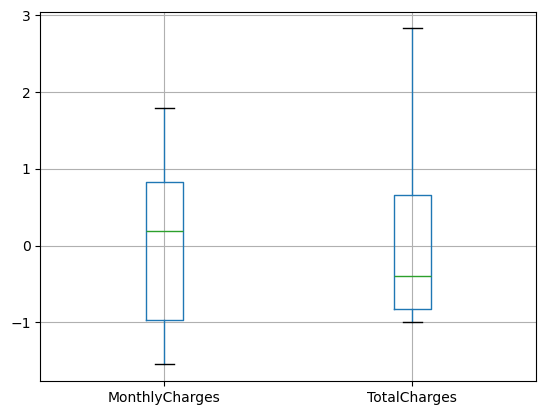

In [15]:
#create boxplots to see if there are potential outliers
X_train_scaled[['MonthlyCharges','TotalCharges']].boxplot()
plt.show()

#### Given that this dataset is capturing churn information. We will next address the imbalanced nature of the data.

In [16]:
#review the distribution of our target variable, Churn from our train dataset to test for imbalance
# display the count of each class in the target column
churn_df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

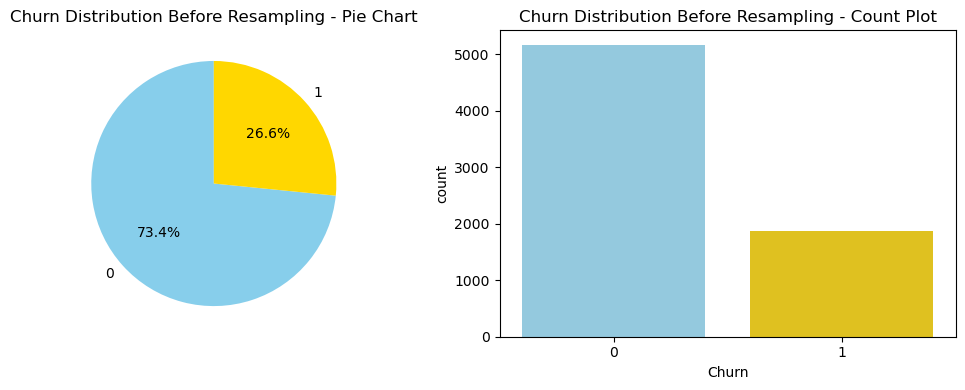

In [17]:
#set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# pie chart for the class distribution
pie_colors = ['skyblue', 'gold']
axes[0].pie(churn_df['Churn'].value_counts(), labels=churn_df['Churn'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
axes[0].set_title('Churn Distribution Before Resampling - Pie Chart')

#count plot for class distribution
countplot_colors = sns.color_palette(pie_colors)
sns.countplot(x='Churn', data=churn_df, palette=countplot_colors, ax=axes[1], hue='Churn', legend=False)
axes[1].set_title('Churn Distribution Before Resampling - Count Plot')

#adjust layout
plt.tight_layout()
plt.show()

Due to the imbalance within the Churn feature, I will try resampling data in an attempt to balance the target feature, Churn.  Given the rather small size
of the data set, I will leverage the over-sampling technique SMOTE + Tomek

In [18]:
#create a function to plot the class distribution after resampling
def plot_resampling_results(y_resampled, title):
    plt.figure(figsize=(4,4))
    pd.Series(y_resampled).value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=pie_colors)
    plt.title(title)
    plt.show()

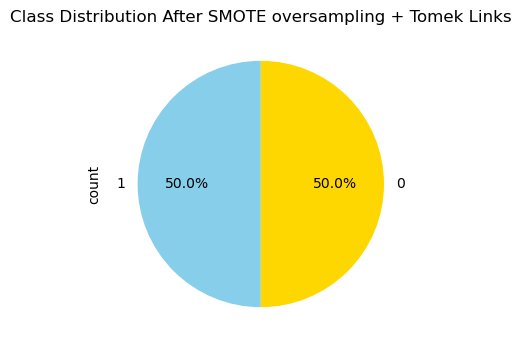

In [19]:
#Combine SMOTE and Tomek Links (note that this function applies SMOTE first and then Tomek Links)
smote_tomek = SMOTETomek()
X_train_st, y_train_st = smote_tomek.fit_resample(X_train_scaled,y_train)
plot_resampling_results(y_train_st, 'Class Distribution After SMOTE oversampling + Tomek Links')

In [20]:
#check the class distribution of target column after SMOTE oversampling + Tomek
y_train_st.value_counts()

Churn
1    3962
0    3962
Name: count, dtype: int64

In [21]:
print(X_train_st.shape, y_train_st.shape)

(7924, 38) (7924,)


In [22]:
print(X_test.shape, y_test.shape)

(1407, 38) (1407,)


In [23]:
#convert arrays back to dataframes for export
X_train_df = pd.DataFrame(X_train_st, columns=column_names)
X_test_df = pd.DataFrame(X_test_scaled, columns=column_names)
y_train_df = pd.DataFrame(y_train_st, columns=['Churn'])  
y_test_df = pd.DataFrame(y_test, columns=['Churn'])

In [24]:
#Export files to csv
X_train_df.to_csv('../data_files/processed/X_train_st.csv', index=False)
X_test_df.to_csv('../data_files/processed/X_test.csv', index=False)
y_train_df.to_csv('../data_files/processed/y_train_st.csv', index=False)
y_test_df.to_csv('../data_files/processed/y_test.csv', index=False)